In [21]:
%pylab inline
import mwlmc_denity_shape_bfe as shape

Populating the interactive namespace from numpy and matplotlib


In [114]:
#data_sphere = np.loadtxt('../rho_t4_bfe_50000000_r_0.txt')
#data_sphere_rand = np.loadtxt('../rho_t4_bfe_5000000_r_0_rand.txt')
#data_sphere2 = np.loadtxt('../rho_t4_bfe_5000000_r_0.txt')
#data_s1 = np.loadtxt('../rho_s1_bfe_5000000_r_0.txt')
data_s1_2 = np.loadtxt('../rho_mwlmc_bfe_5000000_r_0.txt')

In [22]:
x = data_sphere[:,1]
y = data_sphere[:,2]
z = data_sphere[:,3]
rho = data_sphere[:,0]

In [59]:
x_r = data_sphere_rand[:,1]
y_r = data_sphere_rand[:,2]
z_r = data_sphere_rand[:,3]
rho_r = data_sphere_rand[:,0]

In [63]:
x_r2 = data_sphere2[:,1]
y_r2 = data_sphere2[:,2]
z_r2 = data_sphere2[:,3]
rho_r2 = data_sphere2[:,0]

In [115]:
x_s1 = data_s1_2[:,1]
y_s1 = data_s1_2[:,2]
z_s1 = data_s1_2[:,3]
rho_s1 = data_s1_2[:,0]

In [13]:
len(x)

49836032

In [60]:
rand = np.random.randint(0, len(x), 10000)


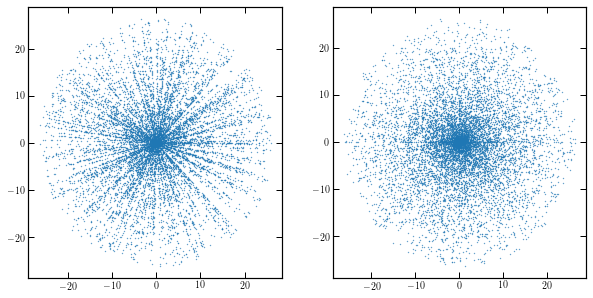

In [19]:
fig, ax = plt.subplots(1, 2, figsize=(10,5))
ax[0].scatter(x[rand], y[rand], s=0.1)
ax[1].scatter(y[rand], z[rand], s=0.1)

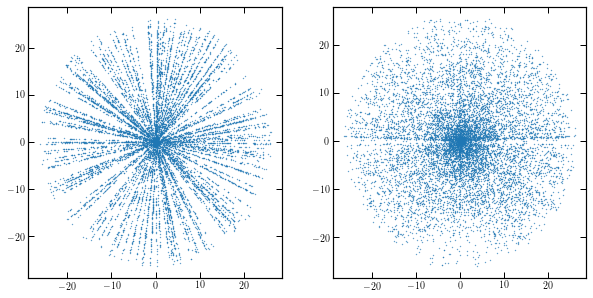

In [76]:
rand2 = np.random.randint(0, len(x_r), 10000)
fig, ax = plt.subplots(1, 2, figsize=(10,5))
ax[0].scatter(x_r[rand2], y_r[rand2], s=0.1)
ax[1].scatter(y_r[rand2], z_r[rand2], s=0.1)

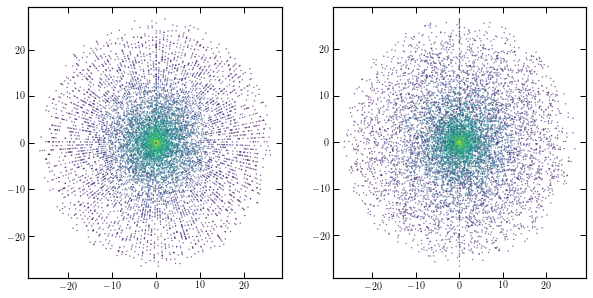

In [109]:
rand3 = np.random.randint(0, len(x_r2), 10000)
fig, ax = plt.subplots(1, 2, figsize=(10,5))
ax[0].scatter(x_r2[rand3], y_r2[rand3], s=0.1, c=np.log10(rho_r2[rand3]))
ax[1].scatter(y_r2[rand3], z_r2[rand3], s=0.1, c=np.log10(rho_r2[rand3]))

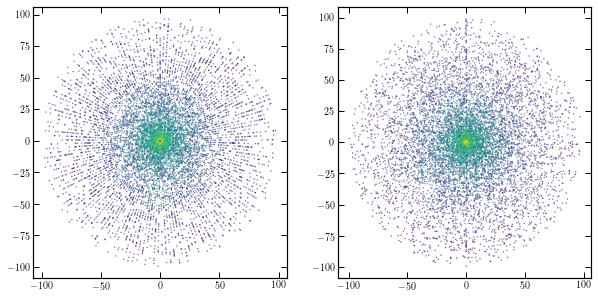

In [128]:
rand4 = np.random.randint(0, len(x_s1), 10000)
fig, ax = plt.subplots(1, 2, figsize=(10,5))
ax[0].scatter(x_s1[rand4], y_s1[rand4], s=0.1, c=np.log10(rho_s1[rand4]))
ax[1].scatter(y_s1[rand4], z_s1[rand4], s=0.1, c=np.log10(rho_s1[rand4]))

In [54]:
def compute_density_contour(dens, nbins, x_grid, y_grid, z_grid, rmax=50, rmin=1, N_min=300):
    assert np.shape(x_grid) == np.shape(y_grid) == np.shape(z_grid) == np.shape(dens)
    contours = np.linspace(np.nanmin(np.log10(np.abs(dens))), np.nanmax(np.log10(np.abs(dens))), nbins+2)
    print(contours)
    index_dens1 = []
    r_shell_mean = []
    N_dots_r = []
    for i in range(1, len(contours)-1):
        delta_rho_low = (contours[i+1]-contours[i])/2.
        delta_rho_high = (contours[i]-contours[i-1])/2.
        #index_dens = np.where((np.log10(np.abs(dens))>=contours[i] - delta_rho_low) & (np.log10(np.abs(dens))<=contours[i] + delta_rho_high))[0]
        index_dens = np.where((np.log10(np.abs(dens))>=contours[i] - delta_rho_low) & (np.log10(np.abs(dens))<=contours[i] + delta_rho_high))[0]

        N_dots = len(index_dens)
        if N_dots > N_min:
            r_shell = (x_grid[index_dens]**2 + y_grid[index_dens]**2 + z_grid[index_dens]**2)**0.5
            dr = np.max(r_shell) - np.min(r_shell)
            print(np.mean(r_shell), dr)
            max_r = np.max(r_shell)
            if (max_r < rmax) & (max_r > rmin) & (N_dots > N_min):
                # Assuring the continuity of the contour by looking at relative
                # distances between the sorted array of distances.
                args_d = np.argsort(r_shell)
                r_sort = np.sort(r_shell)
                r_sort_shift = np.zeros(len(r_sort))
                # Comparing an array with its next element : idea de Elena
                r_sort_shift[:-1] = r_sort[1:]
                r_sort_shift[-1] = r_sort[-1]
                dr = np.abs(r_sort - r_sort_shift)
                # if max dr is larger than  5 median(dr) remove those points
                if np.max(dr) > 5:
                    r_cut = r_sort[np.argmax(dr)]
                    # Distance at which the contours is broken
                    #r_cut = r_shell[largest_shift]
                    index_cut = np.where(r_shell < r_cut)
                    N_dots = len(index_cut[0])
                    if N_dots > N_min:
                        N_dots_r.append(N_dots)
                        index_dens1.append(index_dens[index_cut])
                        r_shell_mean.append(np.median(r_shell[index_cut]))
                        #print("contour at {} with {} points".format(r_shell[index_cut], index_dens[index_cut]))
                else:
                    N_dots_r.append(N_dots)
                    index_dens1.append(index_dens)
                    r_shell_mean.append(np.median(r_shell))
                    #print("contour at {} with {} points".format(r_shell, N_dots))
    #print(r_shell_mean)
    return index_dens1, r_shell_mean, N_dots_r
    #return 0


In [55]:
compute_density_contour(rho, 10, x, y, z, rmax=20, rmin=1)

[0.3346668  0.75736889 1.18007098 1.60277306 2.02547515 2.44817724
 2.87087932 3.29358141 3.7162835  4.13898558 4.56168767 4.98438976]
21.39632260837056 10.517714153205127
14.928031354280295 9.16175809209371
10.130400972403352 6.382438654351067
6.459781489727832 4.570901693066821
3.663323299950275 3.0672013213226323
1.9709257222171017 1.6407678105440162
0.9097127260311909 0.7969601443438314
0.37500342585317303 0.3399917202655387
0.16116694068036175 0.021264365205100416
[10.02630683901119, 6.354731566714165, 3.8390673183358066, 1.9672780447043583, 0.9098468924149561]


0

In [27]:
rho_c, r_ell, N_dost = shape.compute_density_contour(rho, 10, x, y, z, rmax=20, rmin=1)

contour at [11.98767534 11.98767534 11.98767534 ...  8.07726543  8.07726543
  8.07726543] with 7862763 points
contour at [7.37945809 7.37945809 7.37945809 ... 7.02629864 7.02629864 7.02629864] with 6951581 points
contour at [3.97754682 3.97754682 3.97754682 ... 2.79492396 2.79492396 2.79492396] with 4263043 points
contour at [1.90831583 1.90831583 1.90831583 ... 2.79492396 2.79492396 2.79492396] with 2739896 points
contour at [1.19896358 1.19896358 1.19896358 ... 0.74534013 0.74534013 0.74534013] with 1750842 points


In [43]:
np.linspace(np.nanmin(np.log10(np.abs(rho))), np.nanmax(np.log10(np.abs(rho))), 10)


array([0.3346668 , 0.85130269, 1.36793857, 1.88457445, 2.40121034,
       2.91784622, 3.4344821 , 3.95111799, 4.46775387, 4.98438976])

(array([ 9778742., 12114363.,  9605901.,  7964497.,  4623141.,  2926580.,
         1730595.,   677124.,   279665.,   135424.]),
 array([0.3346668 , 0.7996391 , 1.26461139, 1.72958369, 2.19455598,
        2.65952828, 3.12450057, 3.58947287, 4.05444516, 4.51941746,
        4.98438976]),
 <a list of 10 Patch objects>)

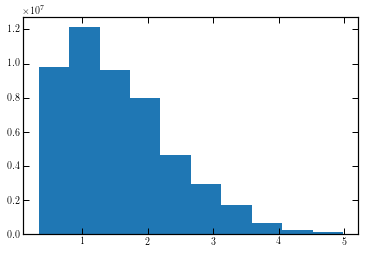

In [45]:
hist(np.log10(rho))

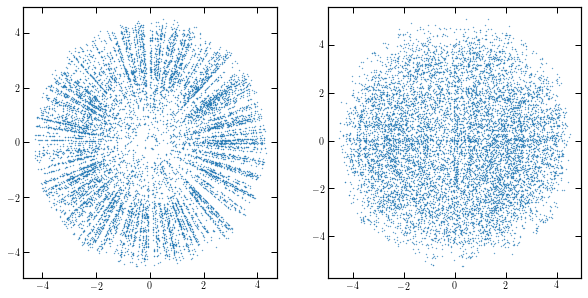

In [31]:
fig, ax = plt.subplots(1, 2, figsize=(10,5))
rand = np.random.randint(0, len(rho_c[2]), 10000)
ax[0].scatter(x[rho_c[2]][rand], y[rho_c[2]][rand], s=0.1)
ax[1].scatter(y[rho_c[2]][rand], z[rho_c[2]][rand], s=0.1)

In [33]:
s, q = shape.compute_contours(r_ell, rho_c, x, y, z, 'fig1')

(0.9086664609707031+0j) (0.9685614167978938+0j)
Done computing density halo shape


/usr/local/lib/python3.5/dist-packages/numpy/core/numeric.py:632: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)


(0.9330509047610138+0j) (0.989084101563035+0j)
Done computing density halo shape
(0.9525300317024233+0j) (0.9676146360105283+0j)
Done computing density halo shape
(0.910363175979705+0j) (0.9588153905776207+0j)
Done computing density halo shape
(0.9487206984374612+0j) (0.9912507365607006+0j)
Done computing density halo shape


/usr/local/lib/python3.5/dist-packages/numpy/core/numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


In [69]:
rho_c, r_ell, N_dost = shape.compute_density_contour(rho_r, 10, x_r, y_r, z_r, rmax=20, rmin=1)
s, q = shape.compute_contours(r_ell, rho_c, x_r, y_r, z_r, 'fig1')

contour at [12.5094502  12.5094502  12.5094502  ... 13.45478883 13.45478883
 13.45478883] with 631558 points
contour at [7.49309656 7.49309656 7.49309656 ... 9.65292562 9.65292562 9.65292562] with 511521 points
contour at [7.49309656 7.49309656 7.49309656 ... 5.61661651 5.61661651 5.61661651] with 403087 points
contour at [3.2602764  3.2602764  3.2602764  ... 5.61661651 5.61661651 5.61661651] with 299715 points
contour at [3.2602764  3.2602764  3.2602764  ... 2.37568409 2.37568409 2.37568409] with 254206 points
contour at [1.13500953 1.13500953 1.13500953 ... 1.51510127 1.51510127 1.51510127] with 71378 points
contour at [1.13500953 1.13500953 1.13500953 ... 0.68000614 0.68000614 0.68000614] with 97029 points
(0.8553863643586747+0j) (0.9851180077341458+0j)
Done computing density halo shape


/usr/local/lib/python3.5/dist-packages/numpy/core/numeric.py:632: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)


(0.8375525291780139+0j) (0.94417241169057+0j)
Done computing density halo shape
(0.8737071526717405+0j) (0.9839915540378376+0j)
Done computing density halo shape
(0.9160428504680761+0j) (0.9662305007543065+0j)
Done computing density halo shape
(0.8757961987781907+0j) (0.9873225695030478+0j)
Done computing density halo shape
(0.8189661536320223+0j) (0.9256628923136132+0j)
Done computing density halo shape
(0.8815851694202871+0j) (0.9122439962489168+0j)
Done computing density halo shape


/usr/local/lib/python3.5/dist-packages/numpy/core/numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


In [68]:
rho_c, r_ell2, N_dost = shape.compute_density_contour(rho_r2, 10, x_r2, y_r2, z_r2, rmax=20, rmin=1)
s2, q2 = shape.compute_contours(r_ell2, rho_c, x_r2, y_r2, z_r2, 'fig1')

/home/xzk/work/github/MW-LMC-SCF/code/halo_shape/mwlmc_denity_shape_bfe.py:88: RuntimeWarning: invalid value encountered in greater_equal
  index_dens = np.where((np.log10(np.abs(dens))>=contours[i] - delta_rho_low) & (np.log10(np.abs(dens))<=contours[i] + delta_rho_high))[0]
/home/xzk/work/github/MW-LMC-SCF/code/halo_shape/mwlmc_denity_shape_bfe.py:88: RuntimeWarning: invalid value encountered in less_equal
  index_dens = np.where((np.log10(np.abs(dens))>=contours[i] - delta_rho_low) & (np.log10(np.abs(dens))<=contours[i] + delta_rho_high))[0]


contour at [12.14990138 12.14990138 12.14990138 ... 16.56804734 16.56804734
 16.56804734] with 748237 points
contour at [ 8.36291913  8.36291913  8.36291913 ... 12.14990138 12.14990138
 12.14990138] with 611531 points
contour at [5.68047337 5.68047337 5.68047337 ... 8.36291913 8.36291913 8.36291913] with 459966 points
contour at [3.47140039 3.47140039 3.47140039 ... 5.36489152 5.36489152 5.36489152] with 343969 points
contour at [2.05128205 2.05128205 2.05128205 ... 3.31360947 3.31360947 3.31360947] with 237156 points
contour at [1.10453649 1.10453649 1.10453649 ... 1.89349112 1.89349112 1.89349112] with 150324 points
(0.8575334179195045+0j) (0.9309292976032505+0j)
Done computing density halo shape


/usr/local/lib/python3.5/dist-packages/numpy/core/numeric.py:632: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)


(0.8610878879527051+0j) (0.9184758468073052+0j)
Done computing density halo shape
(0.8640481863106387+0j) (0.934111591833151+0j)
Done computing density halo shape
(0.8577773355524774+0j) (0.9115676313376012+0j)
Done computing density halo shape
(0.8568065841654198+0j) (0.932002197929673+0j)
Done computing density halo shape
(0.8747236390400904+0j) (0.9196093491180604+0j)
Done computing density halo shape


/usr/local/lib/python3.5/dist-packages/numpy/core/numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


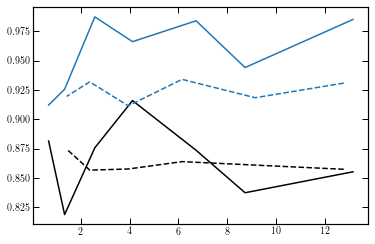

In [72]:
plot(r_ell, s, c='k')
plot(r_ell, q, c='C0')

plot(r_ell2, s2, c='k', ls='--')
plot(r_ell2, q2, c='C0', ls='--')

In [126]:
rho_c, r_ell2, N_dost = shape.compute_density_contour(rho_s1, 40, x_s1, y_s1, z_s1, rmax=300, rmin=10, N_min=50)
s_s1, q_s1 = shape.compute_contours(r_ell2, rho_c, x_s1, y_s1, z_s1, 'fig1')

/home/xzk/work/github/MW-LMC-SCF/code/halo_shape/mwlmc_denity_shape_bfe.py:88: RuntimeWarning: invalid value encountered in greater_equal
  index_dens = np.where((np.log10(np.abs(dens))>=contours[i] - delta_rho_low) & (np.log10(np.abs(dens))<=contours[i] + delta_rho_high))[0]
/home/xzk/work/github/MW-LMC-SCF/code/halo_shape/mwlmc_denity_shape_bfe.py:88: RuntimeWarning: invalid value encountered in less_equal
  index_dens = np.where((np.log10(np.abs(dens))>=contours[i] - delta_rho_low) & (np.log10(np.abs(dens))<=contours[i] + delta_rho_high))[0]


contour at [ 95.26627219  95.26627219  95.26627219 ... 100.         100.
 100.        ] with 61910 points
contour at [ 90.53254438  90.53254438  90.53254438 ... 100.         100.
 100.        ] with 220527 points
contour at [86.39053254 86.39053254 86.39053254 ... 99.40828402 99.40828402
 99.40828402] with 296835 points
contour at [81.65680473 81.65680473 81.65680473 ... 92.89940828 92.89940828
 92.89940828] with 292012 points
contour at [78.10650888 78.10650888 78.10650888 ... 86.98224852 86.98224852
 86.98224852] with 272849 points
contour at [73.96449704 73.96449704 73.96449704 ... 81.65680473 81.65680473
 81.65680473] with 257333 points
contour at [70.41420118 70.41420118 70.41420118 ... 76.33136095 76.33136095
 76.33136095] with 247669 points
contour at [66.27218935 66.27218935 66.27218935 ... 71.59763314 71.59763314
 71.59763314] with 237745 points
contour at [62.72189349 62.72189349 62.72189349 ... 66.86390533 66.86390533
 66.86390533] with 225890 points
contour at [58.57988166 

/usr/local/lib/python3.5/dist-packages/numpy/core/numeric.py:632: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)


(0.961515440799652+0j) (0.9852162930864018+0j)
Done computing density halo shape
(0.9164637710623057+0j) (0.9380251304408623+0j)
Done computing density halo shape
(0.9024491235493266+0j) (0.93404637405066+0j)
Done computing density halo shape
(0.8960606080916556+0j) (0.9350333000214046+0j)
Done computing density halo shape
(0.8948216841945099+0j) (0.9354206199456332+0j)
Done computing density halo shape
(0.8897503700576246+0j) (0.9354190282275697+0j)
Done computing density halo shape
(0.8801169203889971+0j) (0.9333498915313234+0j)
Done computing density halo shape
(0.8765914283046523+0j) (0.9269241546957853+0j)
Done computing density halo shape
(0.8830656931166628+0j) (0.9220719031332368+0j)
Done computing density halo shape
(0.8992627154108265+0j) (0.9183369675385764+0j)
Done computing density halo shape
(0.9122295306630801+0j) (0.927052591505155+0j)
Done computing density halo shape
(0.9056203536527135+0j) (0.93696275652255+0j)
Done computing density halo shape
(0.8744652640990396+0j

/usr/local/lib/python3.5/dist-packages/numpy/core/numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


In [98]:
1/(1/0.9)

0.8999999999999999

(0, 1)

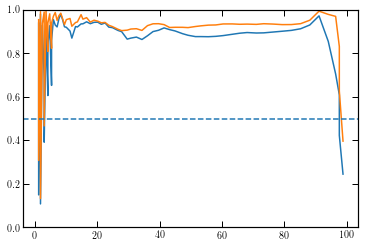

In [123]:
plot(r_ell2, s_s1)
plot(r_ell2, q_s1)
axhline(0.5, ls='--')
ylim(0, 1)

(0, 1)

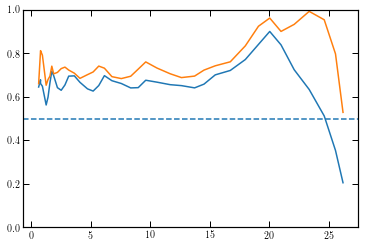

In [113]:
plot(r_ell2, s_s1)
plot(r_ell2, q_s1)
axhline(0.5, ls='--')
ylim(0, 1)

(0, 1)

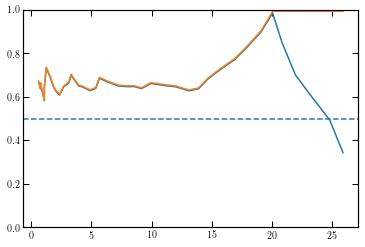

In [108]:
plot(r_ell2, s_s1)
plot(r_ell2, q_s1)
axhline(0.5, ls='--')
ylim(0, 1)

(0, 1)

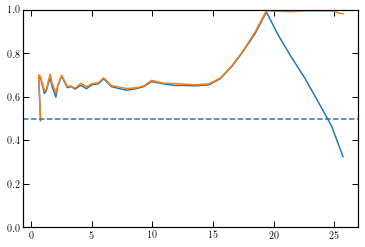

In [104]:
plot(r_ell2, s_s1)
plot(r_ell2, q_s1)
axhline(0.5, ls='--')
ylim(0, 1)